In [4]:
from matplotlib import pyplot as plt
import scipy.interpolate as itp
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np

mpl.rcParams['text.usetex'] = True

cc_kids   = np.loadtxt("./current_constraints/cwdm_kids_95%_logGamma_vs_logvk.csv",   delimiter=",", dtype=float)
cc_planck = np.loadtxt("./current_constraints/cwdm_planck_95%_logGamma_vs_logvk.csv", delimiter=",", dtype=float)

def draw_2d_plot (params_global, params_both, file1, file2):
    min_x_1 = np.min(file1['xs'][:,0])
    max_x_1 = np.max(file1['xs'][:,-1])
    min_y_1 = np.min(file1['ys'][:,0])
    max_y_1 = np.max(file1['ys'][:,-1])
    min_x_2 = np.min(file2['xs'][:,0])
    max_x_2 = np.max(file2['xs'][:,-1])
    min_y_2 = np.min(file2['ys'][:,0])
    max_y_2 = np.max(file2['ys'][:,-1])
    xs_global_2 = np.linspace(min_x_2, max_x_2, 100)
    ys_global_2 = np.linspace(min_y_2, max_y_2, 100)
    xs_global_1 = np.linspace(min_x_1, max_x_1, 100)
    ys_global_1 = np.linspace(min_y_1, max_y_1, 100)

    fig, axs = plt.subplots(1, 2)
    handles_1 = []
    handles_2 = []

    # add current constraints
    axs[0].plot(cc_kids[:,0]*1000, np.log10(cc_kids[:,1]), linestyle="dashed", linewidth=2, color="black", zorder=7)
    axs[1].plot(cc_kids[:,0]*1000, np.log10(cc_kids[:,1]), linestyle="dashed", linewidth=2, color="black", zorder=7)
    handles_1.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constraint\;(KiDS)}$"))
    handles_2.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constraint\;(KiDS)}$"))
    planck_colour = "red"
    axs[0].plot(cc_planck[:,0]*1000, np.log10(cc_planck[:,1]), linestyle="dashed", linewidth=2, color=planck_colour, zorder=6)
    axs[1].plot(cc_planck[:,0]*1000, np.log10(cc_planck[:,1]), linestyle="dashed", linewidth=2, color=planck_colour, zorder=6)
    handles_1.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color=planck_colour, lw=2, label="$\mathrm{Current\;constraint}\;(Planck)$"))
    handles_2.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color=planck_colour, lw=2, label="$\mathrm{Current\;constraint}\;(Planck)$"))

    for i, likelihood in enumerate(file1['likelihoods']):
        x = file1['xs'][i]
        y = file1['ys'][i]
        interp = itp.interp2d(y, x, likelihood)
        interpd_lkl = interp(ys_global_2, xs_global_2)
        axs[0].contourf(
            # file1['ys'][i],
            # file1['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file1['levels'][i],
            # colors=MP_color_cycle[i][0],
            colors=[params_both['colours'][i]],
            alpha=params_global['alphas'][i],
            # extent=file1['extents'][i],
            extent=file2['extents'][i],
        )
        axs[0].contour(
            # file1['ys'][i],
            # file1['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file1['levels'][i],
            colors=[params_both['colours'][i]],
            # extent=file1['extents'][i],
            extent=file2['extents'][i],
            linewidths=2,
        )
        c1, c2, c3 = params_both['colours'][i]
        patch = mpatches.Patch(facecolor=(c1, c2, c3, params_global['alphas'][i]), edgecolor=(c1, c2, c3), label=params_both['names'][i])
        handles_1.append(patch)
    for i, likelihood in enumerate(file2['likelihoods']):
        x = file2['xs'][i]
        y = file2['ys'][i]
        interp = itp.interp2d(y, x, likelihood)
        interpd_lkl = interp(ys_global_2, xs_global_2)
        axs[1].contourf(
            # file2['ys'][i],
            # file2['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file2['levels'][i],
            colors=[params_both['colours'][i]],
            alpha=params_global['alphas'][i],
            extent=file2['extents'][i],
        )
        axs[1].contour(
            # file2['ys'][i],
            # file2['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file2['levels'][i],
            colors=[params_both['colours'][i]],
            extent=file2['extents'][i],
            linewidths=2,
        )
        c1, c2, c3 = params_both['colours'][i]
        patch = mpatches.Patch(facecolor=(c1, c2, c3, params_global['alphas'][i]), edgecolor=(c1, c2, c3), label=params_both['names'][i])
        handles_2.append(patch)

    fig.set_figheight(params_global['figsize'][0])
    fig.set_figwidth (params_global['figsize'][1])
    
    axs[0].legend(handles=handles_1, loc="lower right", fontsize=params_global['legendsize'])
    axs[0].set_xlabel(params_global['xlabel'], fontsize=params_global['fontsize'])
    axs[0].set_ylabel(params_global['ylabel'], fontsize=params_global['fontsize'])
    axs[0].set_xticks(params_global['xticks_location'], params_global['xticks_names'], fontsize=params_global['labelsize'])
    axs[0].set_xticks(params_global['xticks_minor'], minor=True)
    axs[0].set_xlim(params_global['xticks_location'][0], params_global['xticks_location'][-1])
    axs[0].set_yticks(params_global['yticks_location'], params_global['yticks_names'], fontsize=params_global['labelsize'])
    axs[0].set_yticks(params_global['yticks_minor'], minor=True)
    axs[0].set_ylim(params_global['yticks_location'][0], params_global['yticks_location'][-1])
    axs[0].tick_params(direction='in', which="both", right=True, top=True)
    axs[0].set_title('$\mathrm{Pessimistic\; Case}$', fontsize=params_global['titlesize'], pad=20)

    axs[1].legend(handles=handles_2, loc="lower right", fontsize=params_global['legendsize'])
    axs[1].set_xlabel(params_global['xlabel'], fontsize=params_global['fontsize'])
    axs[1].set_ylabel(params_global['ylabel'], fontsize=params_global['fontsize'])
    axs[1].set_xticks(params_global['xticks_location'], params_global['xticks_names'], fontsize=params_global['labelsize'])
    axs[1].set_xticks(params_global['xticks_minor'], minor=True)
    axs[1].set_yticks(params_global['yticks_location'], params_global['yticks_names'], fontsize=params_global['labelsize'])
    axs[1].set_yticks(params_global['yticks_minor'], minor=True)
    axs[1].set_ylim(params_global['yticks_location'][0], params_global['yticks_location'][-1])
    axs[1].set_xlim(params_global['xticks_location'][0], params_global['xticks_location'][-1])
    axs[1].tick_params(direction='in', which="both", right=True, top=True)
    axs[1].set_title('$\mathrm{Optimistic\; Case}$', fontsize=params_global['titlesize'], pad=20)

    dw_tick_labels = np.array(["$100$", "$500$", "$1000$", "", "$2000$", "", "$3000$", "", "$4000$"])
    dw_tick_major  = np.array([100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
    dw_tick_minor  = np.array([250, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250])
    def ticklocator(arr):
        return (94.1 * (0.3145714273 - 0.0491989) * 0.6737 ** 2) ** (1/4) * arr ** (3/4)

    # upper axis showing Dodelson-Widrow mass
    ax0_up = axs[0].twiny()
    ax0_up.set_xlim(axs[0].get_xlim())
    ax0_up.set_xticks(ticklocator(dw_tick_minor), minor=True)
    ax0_up.set_xticks(ticklocator(dw_tick_major))
    ax0_up.set_xticklabels(dw_tick_labels, fontsize=params_global['labelsize'])
    ax0_up.tick_params(direction='in', which="both")
    ax0_up.set_xlabel(r"$f_\mathrm{wdm}^{1/3}\cdot m_\mathrm{wdm}^\mathrm{DW}\;\mathrm{[eV]}$", fontsize=params_global['labelsize'], labelpad=10)
    ax1_up = axs[1].twiny()
    ax1_up.set_xlim(axs[0].get_xlim())
    ax1_up.set_xticks(ticklocator(dw_tick_minor), minor=True)
    ax1_up.set_xticks(ticklocator(dw_tick_major))
    ax1_up.set_xticklabels(dw_tick_labels, fontsize=params_global['labelsize'])
    ax1_up.tick_params(direction='in', which="both")
    ax1_up.set_xlabel(r"$f_\mathrm{wdm}^{1/3}\cdot m_\mathrm{wdm}^\mathrm{DW}\;\mathrm{[eV]}$", fontsize=params_global['labelsize'], labelpad=10)

    axs[0].tick_params(length=8)
    axs[0].tick_params(length=4, which="minor")
    axs[1].tick_params(length=8)
    axs[1].tick_params(length=4, which="minor")
    ax0_up.tick_params(length=8)
    ax0_up.tick_params(length=4, which="minor")
    ax1_up.tick_params(length=8)
    ax1_up.tick_params(length=4, which="minor")

    fig.savefig(params_both['save_file_path'], bbox_inches = "tight")

In [5]:
params_global = {
    'figsize':          (8,16),
    'fontsize':         20,
    'labelsize':        18,
    'legendsize':       20,
    'titlesize':        22,
    'alphas':           [0.2, 0.2, 0.2],
    'xlabel':           "$m_\mathrm{wdm}^\mathrm{thermal}\;\mathrm{[eV]}$",
    'ylabel':           "$f_\mathrm{wdm}$",
    'xticks_location':  [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'xticks_names':     ["$10$", "", "$200$", "", "$400$", "", "$600$", "", "$800$", "", "$1000$"],
    'xticks_minor':     np.linspace(50, 1000, 20),
    'yticks_location':  [-2.5, -2, -1, 0],
    'yticks_names':     ["", "$10^{-2}$", "$10^{-1}$", "$10^0$"],
    'yticks_minor':     np.concatenate(( np.log10(np.linspace(0.001, 0.01, 11)), np.log10(np.linspace(0.01, 0.1, 11)), np.log10(np.linspace(0.1, 1, 11)) )),
}

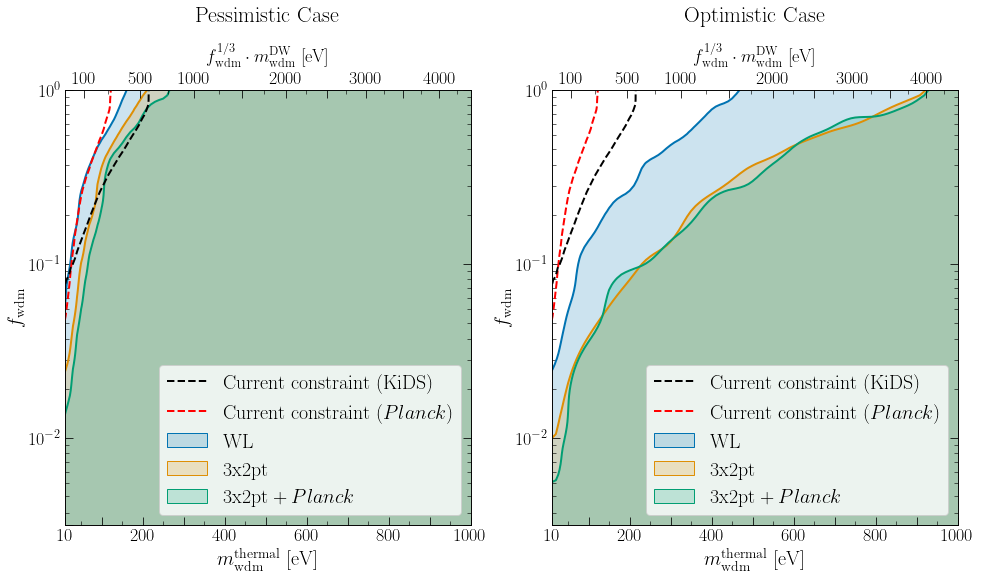

In [6]:
params_both = {
    'save_file_path':   './CWDM/probe comparison.pdf',
    'colours':          [
            (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
            (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), 
            (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)
        ],
    'names':            ['$\mathrm{WL}$', '$\mathrm{3x2pt}$', r'$\mathrm{3x2pt} + Planck$'],
}

filename_pess = "./posteriors/CWDM/pess.npz"
loaded_file_pess = np.load(filename_pess)
likelihoods_pess = np.array(loaded_file_pess['lkl'])
# likelihoods_pess[2,:,:20]  = np.array(loaded_file_pess['lvl'])[2,0] * 0.9
# likelihoods_pess[1,:,:10]  = np.array(loaded_file_pess['lvl'])[0,1] * 0.9
likelihoods_pess[0,:,-10:] = np.array(loaded_file_pess['lvl'])[0,1] * 0.9
file_pess = {
    'xs': np.array(loaded_file_pess['x']),
    'ys': np.array(loaded_file_pess['y']),
    'likelihoods': likelihoods_pess,
    'levels': np.array(loaded_file_pess['lvl']),
    'extents': loaded_file_pess['exts']
}

filename_opt = "./posteriors/CWDM/opt.npz"
loaded_file_opt = np.load(filename_opt)
likelihoods_opt = np.array(loaded_file_opt['lkl'])
likelihoods_opt[0,:10,:]  = np.array(loaded_file_opt['lvl'])[0,1] * 0.9
likelihoods_opt[0,:,-10:] = np.array(loaded_file_opt['lvl'])[0,1] * 0.9
file_opt = {
    'xs': np.array(loaded_file_opt['x']),
    'ys': np.array(loaded_file_opt['y']),
    'likelihoods': likelihoods_opt,
    'levels': np.array(loaded_file_opt['lvl']),
    'extents': loaded_file_opt['exts']
}

draw_2d_plot (params_global, params_both, file_pess, file_opt)

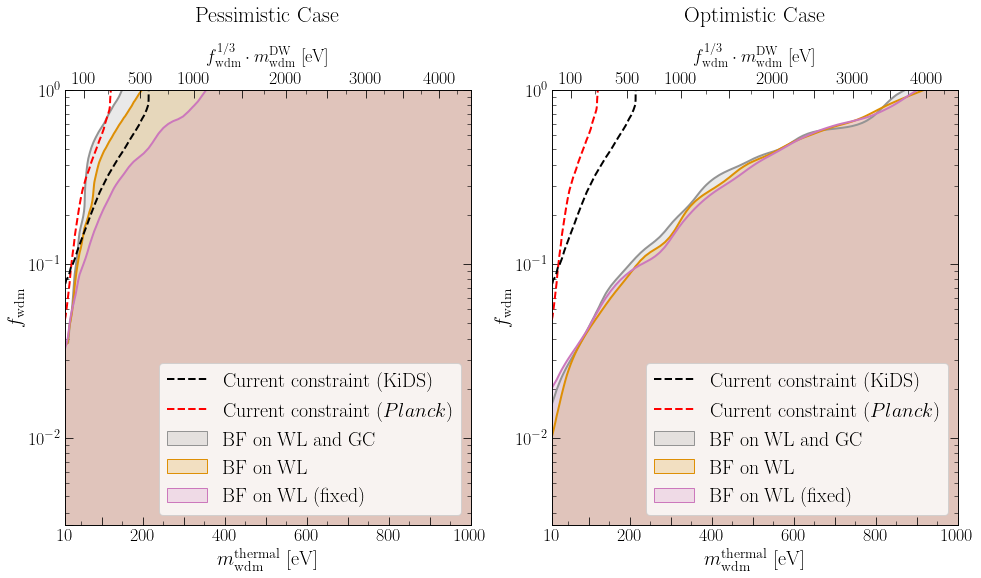

In [7]:
params_both = {
    'save_file_path':   './CWDM/BF comparison.pdf',
    'colours':          [
        (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
        (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        (0.8, 0.47058823529411764, 0.7372549019607844),
    ],
    'names':            [r'$\mathrm{BF\;on\;WL\;and\;GC}$', r'$\mathrm{BF\;on\;WL}$', r'$\mathrm{BF\;on\;WL\;(fixed)}$'],
}

filename_pess = "./posteriors/CWDM/pess_BF_comparison.npz"
loaded_file_pess = np.load(filename_pess)
likelihoods_pess = np.array(loaded_file_pess['lkl'])
likelihoods_pess[1,:20,:] = np.array(loaded_file_pess['lvl'])[1,1] * 0.9
likelihoods_pess[0,:20,:] = np.array(loaded_file_pess['lvl'])[0,1] * 0.9
file_pess = {
    'xs': np.array(loaded_file_pess['x']),
    'ys': np.array(loaded_file_pess['y']),
    'likelihoods': likelihoods_pess,
    'levels': np.array(loaded_file_pess['lvl']),
    'extents': loaded_file_pess['exts']
}

filename_opt = "./posteriors/CWDM/opt_BF_comparison.npz"
loaded_file_opt = np.load(filename_opt)
likelihoods_opt = np.array(loaded_file_opt['lkl'])
likelihoods_opt[2,:10,:] = np.array(loaded_file_opt['lvl'])[0,1] * 0.9
file_opt = {
    'xs': np.array(loaded_file_opt['x']),
    'ys': np.array(loaded_file_opt['y']),
    'likelihoods': likelihoods_opt,
    'levels': np.array(loaded_file_opt['lvl']),
    'extents': loaded_file_opt['exts']
}

draw_2d_plot (params_global, params_both, file_pess, file_opt)